In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [35]:
# Cargar el dataset
dataset = pd.read_csv('student-mat.csv', delimiter=';')

In [36]:
# Función para aplicar el OneHotEncoder
def encoder(columna, df):
    encoder = OneHotEncoder()

    colegios_valores_encoded = encoder.fit_transform(df[[columna]])
    colegios_columnas_encoded = encoder.get_feature_names_out([columna])
    encoded_df = pd.DataFrame(colegios_valores_encoded.toarray(), columns=colegios_columnas_encoded)

    df = pd.concat([df, encoded_df], axis=1)
    df = df.drop(columns=[columna])
    return df

In [37]:
# Vemos las columnas categóricas
columnas_obj = []

for columna in dataset.columns:
    if dataset[columna].dtype == object:
        columnas_obj.append(columna)

print(columnas_obj)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [38]:
# Les aplicamos la función a cada columna categórica
for columna in columnas_obj:
    dataset = encoder(columna, dataset)

Generamos la columna "Aprobado" a partir de las notas en G3, de 0 a 9.99, 0 (suspenso), de 10 en adelante 1 (aprobado)

In [39]:
dataset['Aprobado'] = (dataset['G3'] >= 10).astype(int)

G3_column = dataset['G3']
dataset = dataset.drop(columns=['G3'])

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset.drop(columns=['Aprobado']))

X = pd.DataFrame(dataset_scaled, columns=dataset.drop(columns=['Aprobado']).columns)

Y = dataset['Aprobado']

In [40]:
dataset["Aprobado"]

0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: Aprobado, Length: 395, dtype: int32

In [41]:
dataset

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  activities_yes  nursery_no  nursery_yes  higher_no  \
0        4     1  ...             0.0         0.0          1.0        0.0   
1        3     1  ...             0.0         1.0          0.0        0.0   
2        2     2  ...             0.0         0.0          1.0        0.0   
3        2     1  ...             1.0         0.0          1.0        0.0   
4        2     1  ...             0.0         0.0          1.0        0.0   
..     ...   ...  ...             ...         ...          ...        ...   
390      4     4  ...             0.0         0.0          1.0        0.0   
391      5     3  ...             0.0         1.0          0.0        0.0   
392      3     3  ...             0.0         1.0          0.0        0.0   
393      1     3  ...             0.0         1.0          0.0        0.0   
394      3     3  ...             0.0         0.0          1.0        0.0   

     higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  \
0           1.0          1.0           0.0          1.0           0.0   
1           1.0          0.0           1.0          1.0           0.0   
2           1.0          0.0           1.0          1.0           0.0   
3           1.0          0.0           1.0          0.0           1.0   
4           1.0          1.0           0.0          1.0           0.0   
..          ...          ...           ...          ...           ...   
390         1.0          1.0           0.0          1.0           0.0   
391         1.0          0.0           1.0          1.0           0.0   
392         1.0          1.0           0.0          1.0           0.0   
393         1.0          0.0           1.0          1.0           0.0   
394         1.0          0.0           1.0          1.0           0.0   

     Aprobado  
0           0  
1           0  
2           1  
3           1  
4           1  
..        ...  
390         0  
391         1  
392         0  
393         1  
394         0  

[395 rows x 59 columns]

In [42]:
# Seleccionar las columnas para el modelo de regresión lineal: horas de estudio, edad, faltas, repeticiones, nota 1º, 2º evaluación
X = dataset[['studytime', 'age', 'absences', 'failures', 'goout', 'G1', 'G2']]
Y = dataset['Aprobado']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

Accuracy: 89.87%

Matriz de Confusión:
[[24  3]
 [ 5 47]]


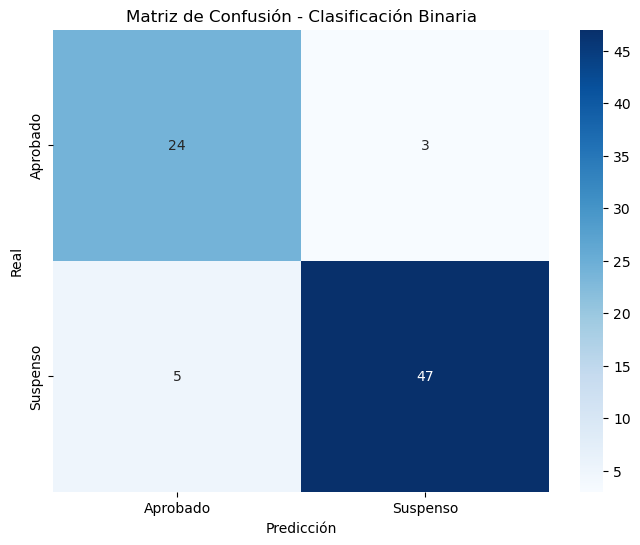

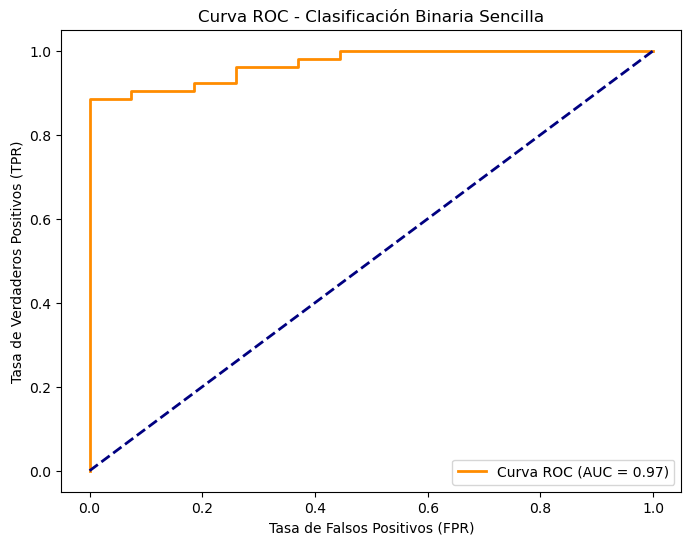

AUC: 0.97


In [43]:
# Crear el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=10000)

# Entrenar el modelo con el conjunto de entrenamiento
log_reg.fit(X_train, Y_train)

# Realizar predicciones con el conjunto de prueba
Y_pred = log_reg.predict(X_test)

# Calcular Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Obtener la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprobado", "Suspenso"], yticklabels=["Aprobado", "Suspenso"])
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
Y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria (AUC = 0.5)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificación Binaria Sencilla')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')

Scores en cada fold: [0.86075949 0.93670886 0.94936709 0.88607595 0.93670886]
Accuracy promedio: 0.91
Desviación estándar: 0.03


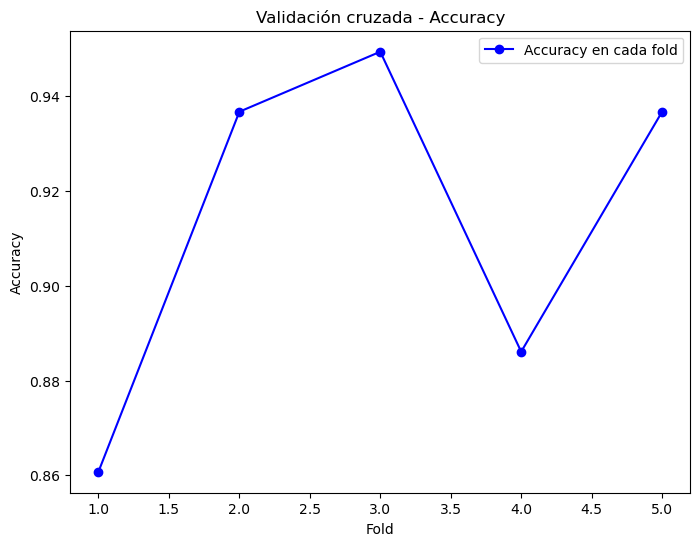

In [44]:
# Realizar la validación cruzada
scores = cross_val_score(log_reg, X, Y, cv=5)

print(f'Scores en cada fold: {scores}')
print(f'Accuracy promedio: {scores.mean():.2f}')
print(f'Desviación estándar: {scores.std():.2f}')

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', color='b', label='Accuracy en cada fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Validación cruzada - Accuracy')
plt.legend()
plt.show()

## Problemas encontrados

    En clasificación:

    Escalado de datos no se debe aplicar a G3.

    Solución: Generar la nueva columna de aprobados.

    Matriz de confusión.

    
    En regresión lineal:

    Al hacer el OneHotEncoder se generaban muchas columnas y salían demasiadas en la matriz de correlación
    
    Solución: Hacer la correlación de las características solo con G3